# Contents

1. Business Understanding
2. Data Understanding
3. Data Cleaning and Manipulation
4. Data Visualization 
5. Data Preparation
6. Data Modeling and Evaluation on trained dataset
7. Residual Analysis on the trained dataset
8. Validating the assumptions on the trained dataset
9. Data Modeling and Evaluation on Test dataset
10. Residual Analysis on the Test dataset
11. Validating the assumptions on the Trained dataset
12. Calculations of R-square and Adjusted R-sqaures values
13. Final Model and conclusion

# Business Understanding

## What is BoomBikes

A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Business Objective

The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Requirements

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands.

## What needs to be done 

1. Create a linear model that describe the effect of various features on demand.
2. The model should be interpretable so that the management can understand it.



# Data Understanding

In [ ]:


#importing all the important libraries like numpy,pandas, matlplolib,seaborn,Statsmodels,Sklearn for various operations
#ignore warnings to keep notebook clean
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings   
warnings.filterwarnings("ignore")

# The Below libraries are used to perform model evaluation techniques and prediction analysis 
# like Linear regression , Minmax scaling , r2-score, statsmodels , sklearn, VIF and RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split             
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression                
from sklearn.feature_selection import RFE                       

In [2]:
# Importing the Loan.csv file

boom_bikes_data = pd.read_csv('day.csv')

In [3]:
# To View the records of the dataset to check how it is looks like in python notebook.
# Also to ensure the csv file is read properly or not,
boom_bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Renaming certain columns for better understanding

boom_bikes_data = boom_bikes_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity','atemp':'feelingtemp'})

In [5]:
print('No of empty Rows:')
print(boom_bikes_data.isnull().all(axis=1).sum())
print('Number of empty Columns:')
print(boom_bikes_data.isnull().all(axis=0).sum())
    
#There are no empty rows and columns in whole dataset.

No of empty Rows:
0
Number of empty Columns:
0


In [6]:
# this lines of code confirms that there is no duplicate in the dataset

print(boom_bikes_data.shape)
boom_bikes_data.drop_duplicates(inplace=True)
print(boom_bikes_data.shape)

(730, 16)
(730, 16)


In [7]:
# Checking all the column information and the datatypes of each column. 'All' is used to see all the columns.

boom_bikes_data.info("all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      730 non-null    int64  
 1   dteday       730 non-null    object 
 2   season       730 non-null    int64  
 3   year         730 non-null    int64  
 4   month        730 non-null    int64  
 5   holiday      730 non-null    int64  
 6   weekday      730 non-null    int64  
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    int64  
 9   temp         730 non-null    float64
 10  feelingtemp  730 non-null    float64
 11  humidity     730 non-null    float64
 12  windspeed    730 non-null    float64
 13  casual       730 non-null    int64  
 14  registered   730 non-null    int64  
 15  cnt          730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [8]:
# checking the Rows and columns of the given dataset
boom_bikes_data.shape

(730, 16)

In [9]:
# Checking the quantitative metrics for the quantitative columns
# Checking the mean, median,mode , quantiles of any levels
boom_bikes_data.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Cleaning and Manipulation

In [10]:
# Checking the null values in the dataset

boom_bikes_data.isnull().sum()

# This states that there is no null values in the dataset

instant        0
dteday         0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
feelingtemp    0
humidity       0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

In [11]:
#To check how many columns present in dataset
print(boom_bikes_data.columns)

# Column - Instant - It looks like that column behaves as a index. So we can ignore this column
# Column - Dteday  - The content(yr,day,mth) of this column is already present in seperate columns.So we can ignore this column
# Column - Casual  - We are taking cnt as target variable , so other two is not required. won't consider into the dataset.
data_with_unnecessary_columns = boom_bikes_data[['instant','dteday','casual','registered']]

# Hence Removing all the Unnecessary columns.
boom_bikes_data = boom_bikes_data.drop(data_with_unnecessary_columns,axis=1)

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'feelingtemp', 'humidity',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')


In [12]:
#To check columns present in dataset
print(boom_bikes_data.columns)

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'feelingtemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')


In [13]:
# Checking again the column information after removal of certain columns

boom_bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    int64  
 1   year         730 non-null    int64  
 2   month        730 non-null    int64  
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    int64  
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    int64  
 7   temp         730 non-null    float64
 8   feelingtemp  730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [14]:
# In the dataset we can see some more categorial variables which are present in numeric format which is unclear for analysis
# So changing those numeric variables with certain categorial values

# So Those columns are season , weekday, weathersit and month
# Seasons have 4 categories. (spring,summer,fall,winter)
# Weekday have 7 categories. (sun,mon,tue,wed,thu,fri,sat)
# Month have 12 categories (jan,feb,mar,apr,may,june,july,aug,sept,oct,nov and dec)

boom_bikes_data['season'] = boom_bikes_data['season'].map({1:'Spring', 
                                                           2:'Summer', 
                                                           3:'Fall',
                                                           4:'Winter'})

boom_bikes_data['weekday'] = boom_bikes_data['weekday'].map({0:'SUN',
                                                             1:'MON',
                                                             2:'TUE',
                                                             3:'WED',
                                                             4:'THU',
                                                             5:'FRI',
                                                             6:'SAT'})

boom_bikes_data['weathersit'] = boom_bikes_data['weathersit'].map({1:'Clear',
                                                                   2:'Mist',
                                                                   3:'Lightsnow'
                                                                   })

boom_bikes_data['month'] = boom_bikes_data['month'].map({1:'JAN',
                                                         2:'FEB',
                                                         3:'MAR',
                                                         4:'APR',
                                                         5:'MAY',
                                                         6:'JUNE',
                                                         7:'JULY',
                                                         8:'AUG',
                                                         9:'SEP',
                                                         10:'OCT',
                                                         11:'NOV',
                                                         12:'DEC'})

In [15]:
# To View the records of the dataset

boom_bikes_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,cnt
0,Spring,0,JAN,0,SAT,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,JAN,0,SUN,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,JAN,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,JAN,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,JAN,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

1. Perform EDA to understand various variables.
2. Check the correlation between the variables.


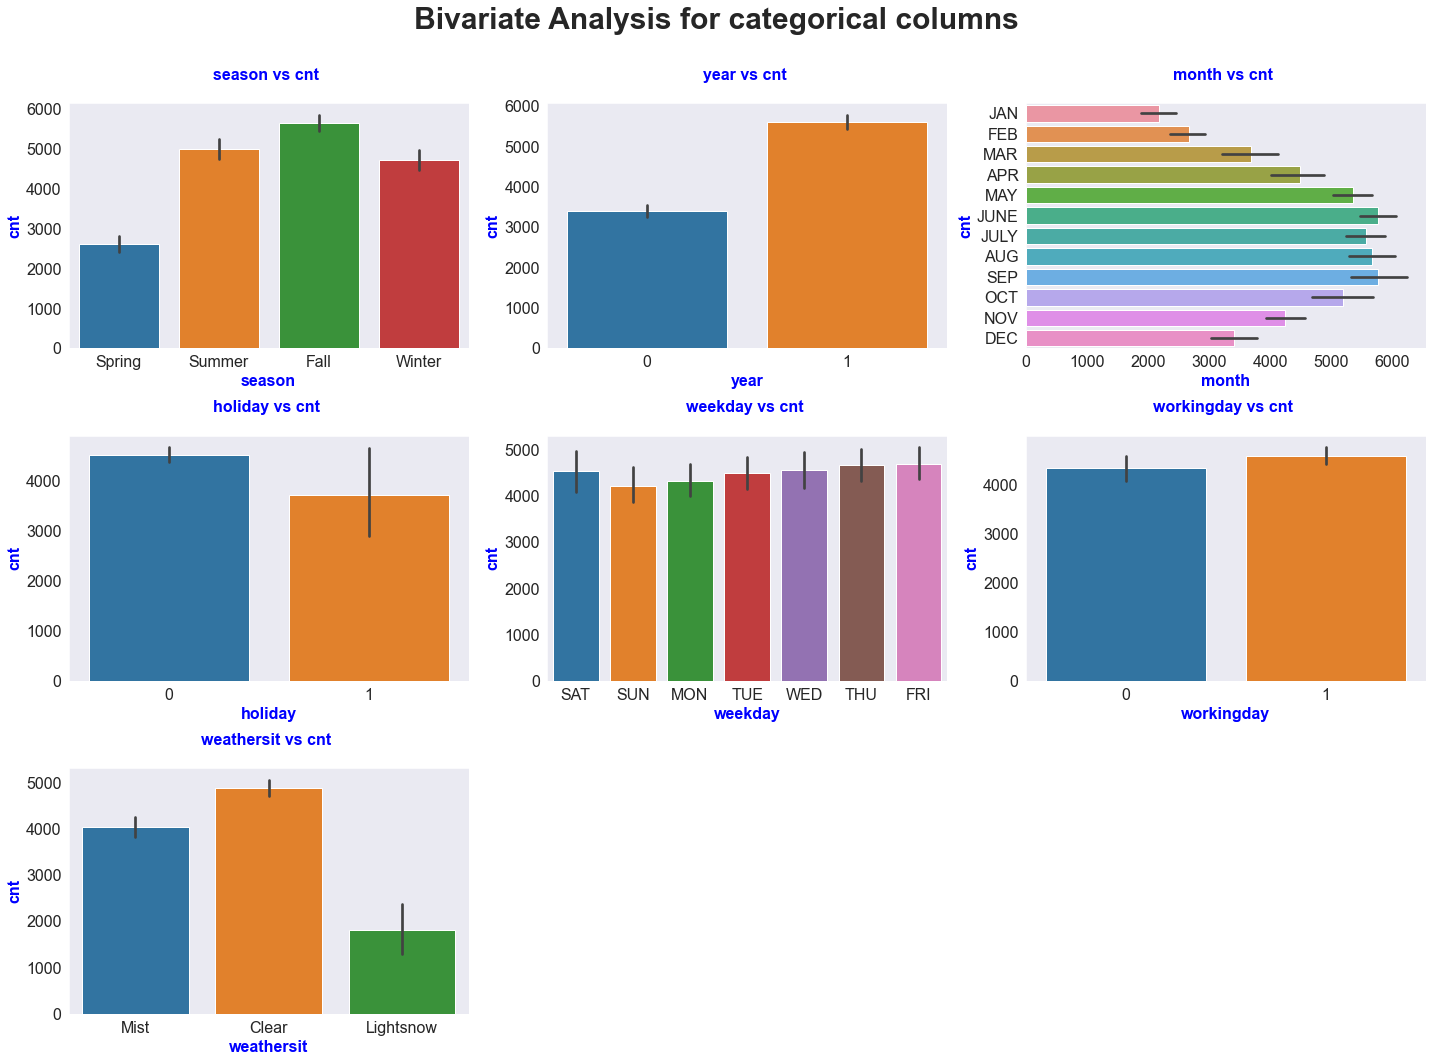

In [16]:
# Bivariate Analysis for categorical columns

plt.figure(figsize=(20,15))
sns.set_style("dark")
plt.suptitle("Bivariate Analysis for categorical columns\n",fontweight ="bold",fontsize=30)
# subplot 1
plt.subplot(3, 3 ,1)
AS = sns.barplot(x='season', y='cnt',data=boom_bikes_data)
AS.set_title('season vs cnt \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('season',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('cnt',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 2
plt.subplot(3,3,2)
AS = sns.barplot(x='year', y='cnt',data=boom_bikes_data)
AS.set_title('year vs cnt \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('year',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('cnt',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
plt.tight_layout()
# subplot 3
plt.subplot(3, 3, 3)
AS = sns.barplot(x='cnt', y='month',data=boom_bikes_data)
AS.set_title('month vs cnt \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('month',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('cnt',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 4
plt.subplot(3, 3, 4)
AS = sns.barplot(x='holiday', y='cnt',data=boom_bikes_data)
AS.set_title('holiday vs cnt \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('holiday',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('cnt',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 5
plt.subplot(3, 3, 5)
AS = sns.barplot(x='weekday', y='cnt',data=boom_bikes_data)
AS.set_title('weekday vs cnt \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('weekday',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('cnt',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 6
plt.subplot(3, 3, 6)
AS = sns.barplot(x='workingday', y='cnt',data=boom_bikes_data)
AS.set_title('workingday vs cnt \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('workingday',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('cnt',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 7
plt.subplot(3, 3, 7)
AS = sns.barplot(x='weathersit', y='cnt',data=boom_bikes_data)
AS.set_title('weathersit vs cnt \n',fontsize=16,color='b',fontweight ="bold")
AS.set_xlabel('weathersit',fontsize=16,color = 'b',fontweight ="bold")
AS.set_ylabel('cnt',fontsize=16,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
plt.tight_layout()
plt.show()

# Observations for Bivariate Analysis

1. The Bike Sharing Bookings are high during FALL Season.
2. The Bike Sharing Bookings are high in the year 2019.
3. The Bike Sharing Bookings are high in the middle of the year (may to oct).
4. At start of the year tends to increase and at the end of the year it decreases
5. The Bike Sharing Bookings are high in Weekends and holidays
6. The Bike Sharing Bookings are high when they slightly moving towards weekends.
7. The Bike Sharing Bookings are high in the clear weather compared to mist and lightsnow

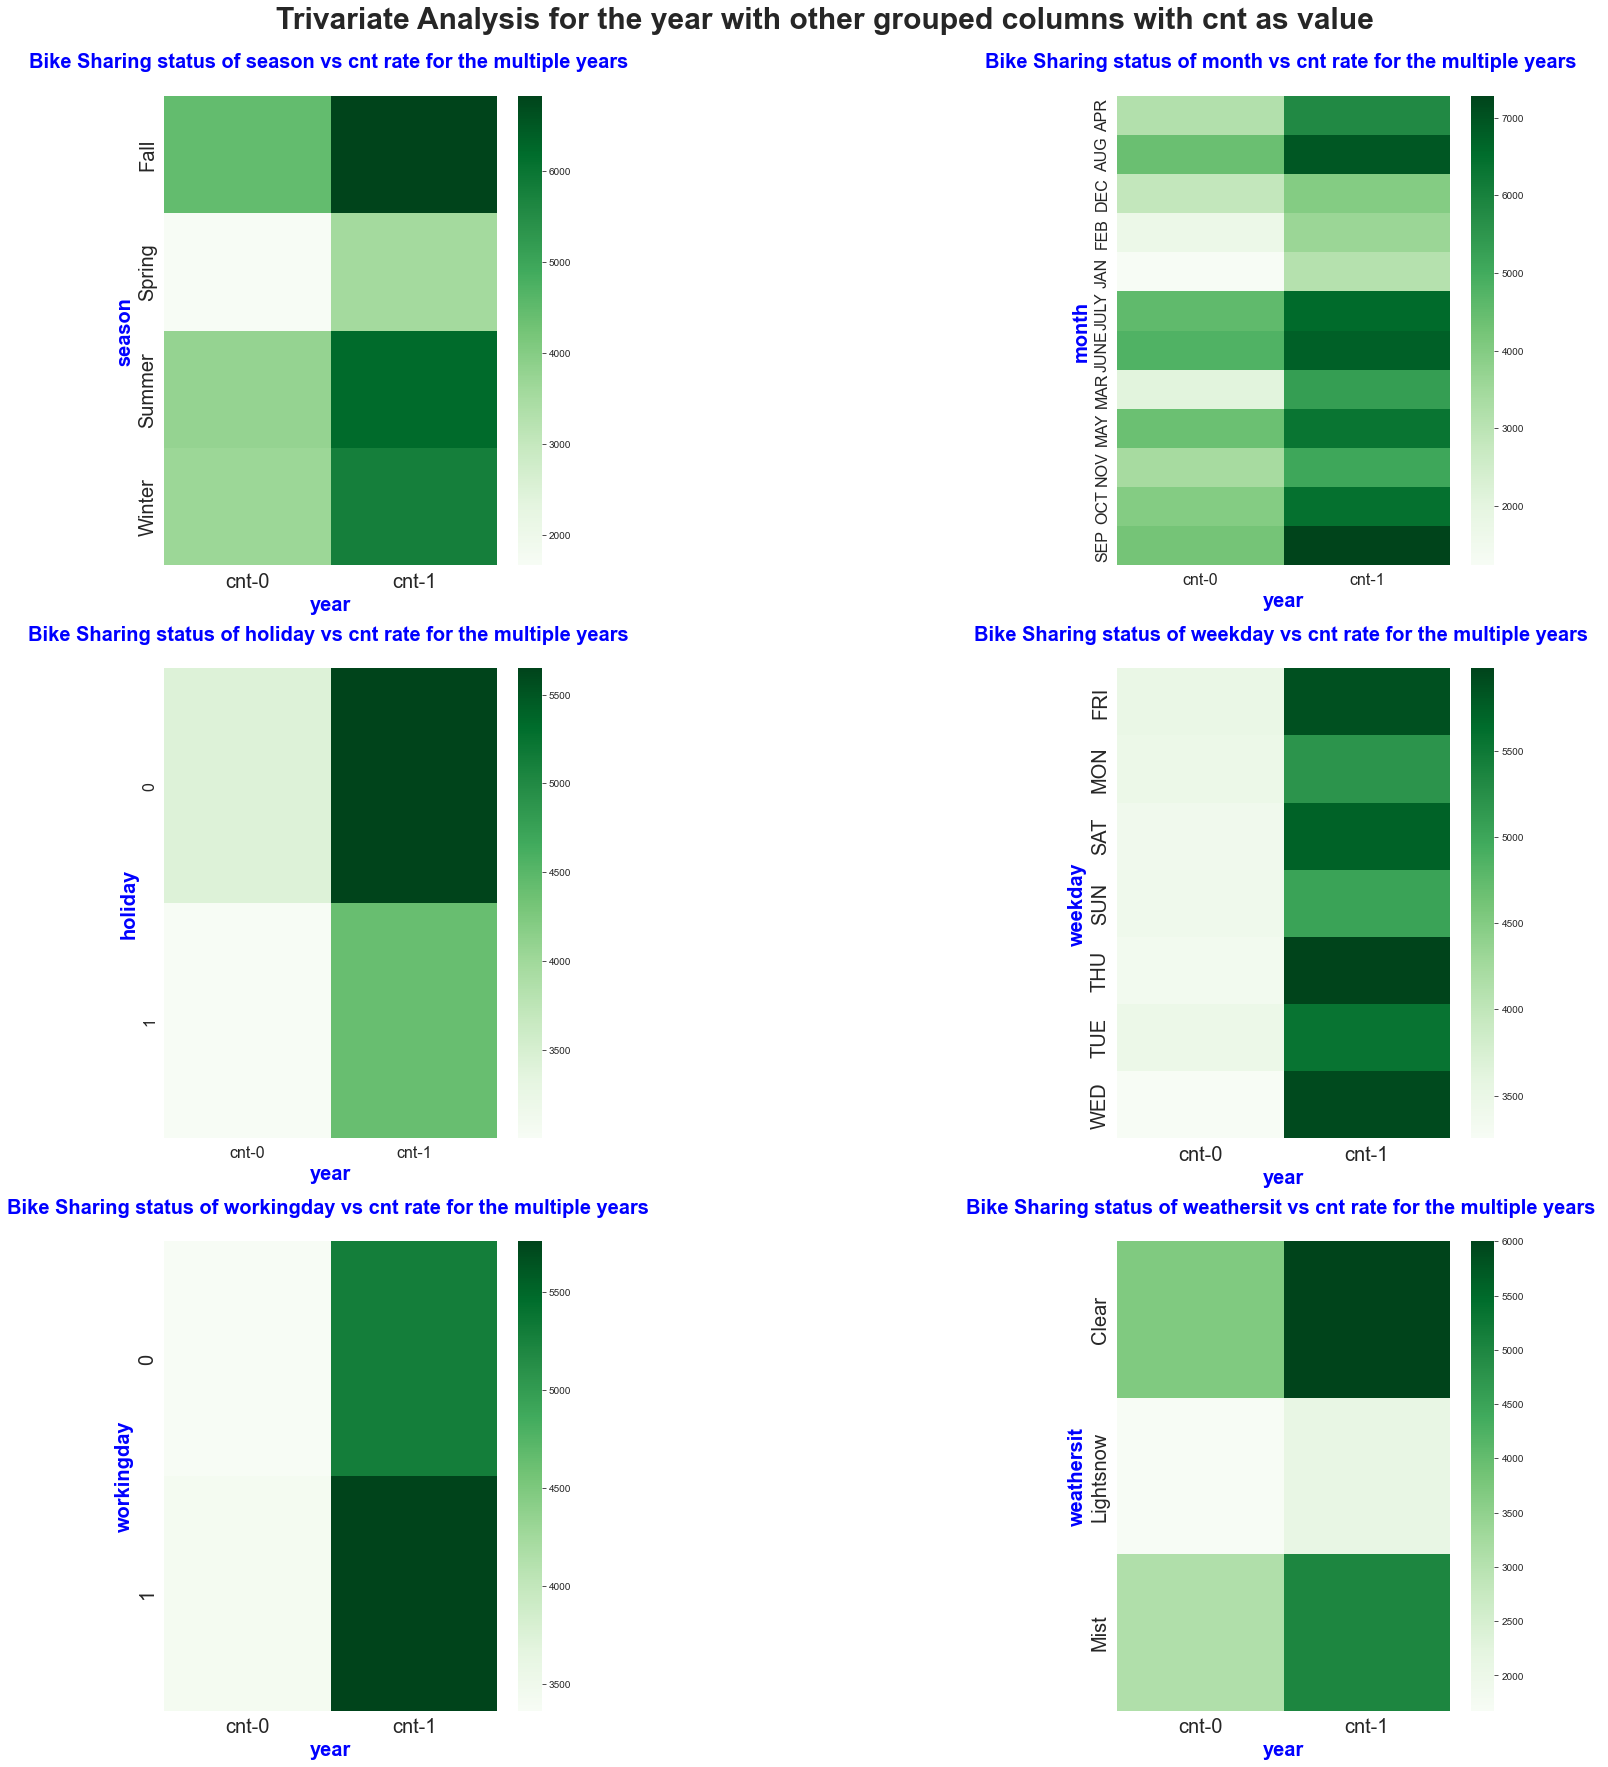

In [17]:
# Trivariate Analysis for loan amount grp , annual income grp and dti grp columns

plt.figure(figsize=(20,25))
sns.set_style("dark")
plt.suptitle("Trivariate Analysis for the year with other grouped columns with cnt as value\n",fontweight ="bold",fontsize=30)
# subplot 1
plt.subplot(3, 3, 1)
AS = sns.heatmap(boom_bikes_data.pivot_table(index=['season'],columns=['year'],values=['cnt']),cmap='Greens')
AS.set_title('Bike Sharing status of season vs cnt rate for the multiple years \n',fontsize=20,color='b',fontweight ="bold")
AS.set_xlabel('year',fontsize=20,color = 'b',fontweight ="bold")
AS.set_ylabel('season',fontsize=20,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=20)
AS.yaxis.set_tick_params(labelsize=20)
# subplot 2
plt.subplot(3, 3, 3)
AS = sns.heatmap(boom_bikes_data.pivot_table(index=['month'],columns=['year'],values=['cnt']),cmap='Greens')
AS.set_title('Bike Sharing status of month vs cnt rate for the multiple years \n',fontsize=20,color='b',fontweight ="bold")
AS.set_xlabel('year',fontsize=20,color = 'b',fontweight ="bold")
AS.set_ylabel('month',fontsize=20,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 3
plt.subplot(3, 3, 4)
AS = sns.heatmap(boom_bikes_data.pivot_table(index=['holiday'],columns=['year'],values=['cnt']),cmap='Greens')
AS.set_title('Bike Sharing status of holiday vs cnt rate for the multiple years \n',fontsize=20,color='b',fontweight ="bold")
AS.set_xlabel('year',fontsize=20,color = 'b',fontweight ="bold")
AS.set_ylabel('holiday',fontsize=20,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=16)
AS.yaxis.set_tick_params(labelsize=16)
# subplot 4
plt.subplot(3, 3, 6)
AS = sns.heatmap(boom_bikes_data.pivot_table(index=['weekday'],columns=['year'],values=['cnt']),cmap='Greens')
AS.set_title('Bike Sharing status of weekday vs cnt rate for the multiple years \n',fontsize=20,color='b',fontweight ="bold")
AS.set_xlabel('year',fontsize=20,color = 'b',fontweight ="bold")
AS.set_ylabel('weekday',fontsize=20,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=20)
AS.yaxis.set_tick_params(labelsize=20)
# subplot 5
plt.subplot(3, 3, 7)
AS = sns.heatmap(boom_bikes_data.pivot_table(index=['workingday'],columns=['year'],values=['cnt']),cmap='Greens')
AS.set_title('Bike Sharing status of workingday vs cnt rate for the multiple years \n',fontsize=20,color='b',fontweight ="bold")
AS.set_xlabel('year',fontsize=20,color = 'b',fontweight ="bold")
AS.set_ylabel('workingday',fontsize=20,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=20)
AS.yaxis.set_tick_params(labelsize=20)
# subplot 6
plt.subplot(3, 3, 9)
AS = sns.heatmap(boom_bikes_data.pivot_table(index=['weathersit'],columns=['year'],values=['cnt']),cmap='Greens')
AS.set_title('Bike Sharing status of weathersit vs cnt rate for the multiple years \n',fontsize=20,color='b',fontweight ="bold")
AS.set_xlabel('year',fontsize=20,color = 'b',fontweight ="bold")
AS.set_ylabel('weathersit',fontsize=20,color = 'b',fontweight ="bold")
AS.xaxis.set_tick_params(labelsize=20)
AS.yaxis.set_tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# Observations for Trivariate Analysis

1. The Bike sharing bookings are high in fall season in the year 2019
2. The Bike sharing bookings are high in may,june,Aug,sept,oct in the year 2019
3. The Bike Sharing Bookings are high in Weekends and holidays in the year 2019
4. The Bike Sharing Bookings are high when they slightly moving towards weekends in the year 2019
5. The Bike Sharing Bookings are high in the clear weather compared to mist and lightsnow in the year 2019

## Overall the Bike sharing bookings are high in the year 2019 and very low in 2018

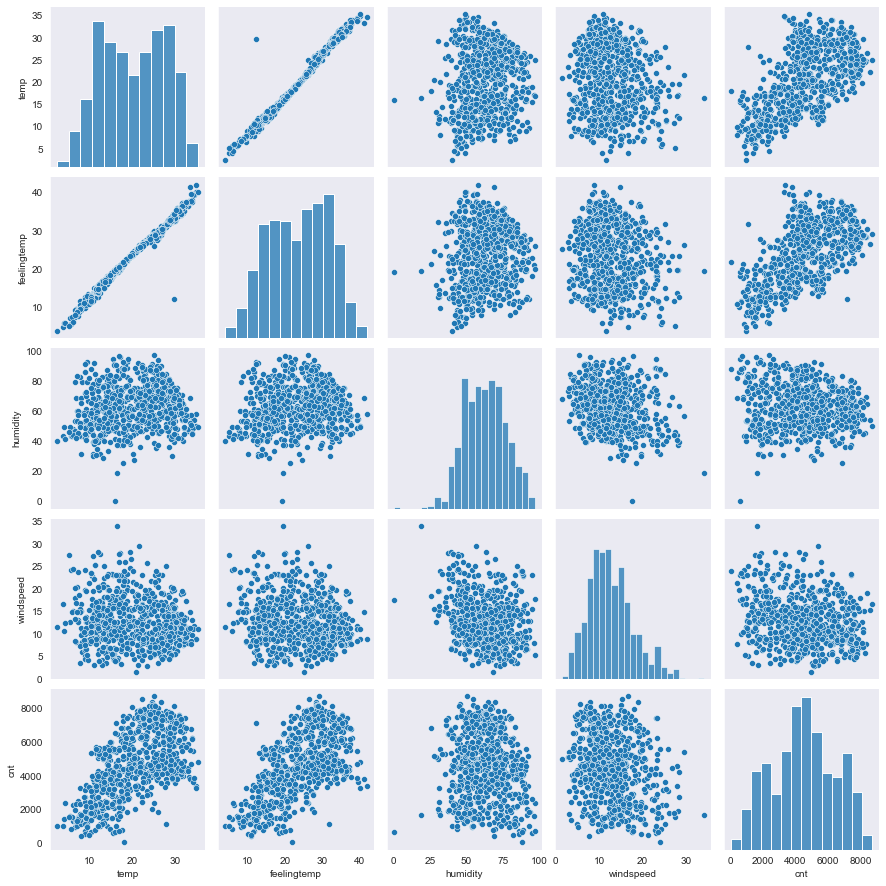

In [18]:
# To visualize all the numerical columns in a single chart , then plot pairplot using seaborn

sns.pairplot(boom_bikes_data, vars=['temp','feelingtemp','humidity','windspeed',"cnt"])
plt.show()

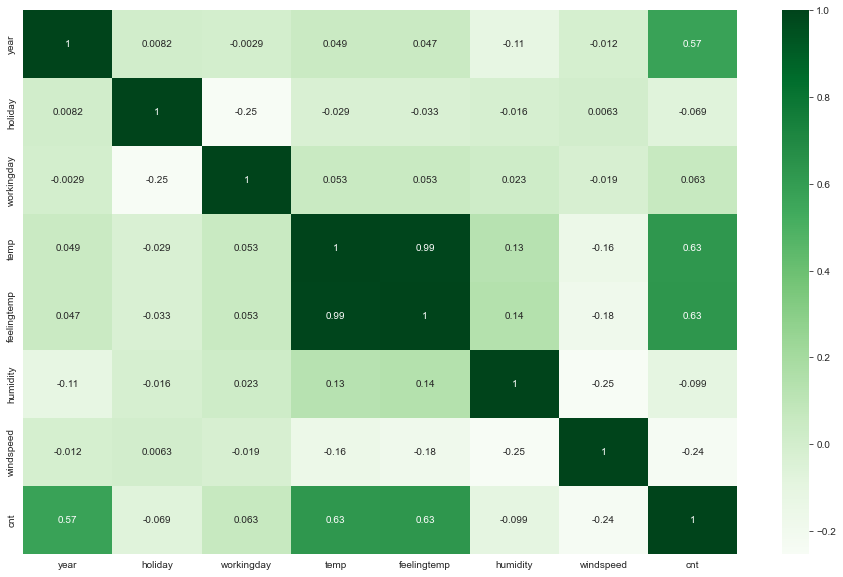

In [19]:
# To check the correlation between all the columns

plt.figure(figsize = (16, 10))
sns.heatmap(boom_bikes_data.corr(), annot = True, cmap="Greens")
plt.show()

#### Both the Pairplot and correlation provides the information that temp and feelingtemp has highly correlated 0.99 

# Data Preparation

1. Create dummy variables for all the categorical features.
2. Divide the data to train & Test.
3. Perform Scaling.
4. Divide data into dependent & Independent variables.

## 1.Creation of Dummy Variables

### Variables Chosen


 1. Season
 2. months
 3. weathersit
 4. weekday

In [20]:
# Creating dummy variables using get_dummies command
months_dummy=pd.get_dummies(boom_bikes_data.month,drop_first=True)
weekdays_dummy=pd.get_dummies(boom_bikes_data.weekday,drop_first=True)
weathersit_dummy=pd.get_dummies(boom_bikes_data.weathersit,drop_first=True)
seasons_dummy=pd.get_dummies(boom_bikes_data.season,drop_first=True)

# Adding those dummy columns to the dataset
boom_bikes_data=pd.concat([boom_bikes_data,months_dummy,weekdays_dummy,weathersit_dummy,seasons_dummy],axis=1)

# Removing the original columns which was there before dummy variables creation.Since we created dummy variables, so drop them.

boom_bikes_data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)


In [21]:
# Checking again the column information after removal of certain columns and addition of dummy variables

boom_bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   feelingtemp  730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   AUG          730 non-null    uint8  
 9   DEC          730 non-null    uint8  
 10  FEB          730 non-null    uint8  
 11  JAN          730 non-null    uint8  
 12  JULY         730 non-null    uint8  
 13  JUNE         730 non-null    uint8  
 14  MAR          730 non-null    uint8  
 15  MAY          730 non-null    uint8  
 16  NOV          730 non-null    uint8  
 17  OCT          730 non-null    uint8  
 18  SEP          730 non-null    uint8  
 19  MON     

In [22]:
# checking the Rows and columns of the given dataset
boom_bikes_data.shape

(730, 30)

## 2.Now the Data is ready to get split for training and testing datasets

In [23]:
# Now we are splitting whole dataset into two splits under some ratio.train split and test split
np.random.seed(0)
boom_bikes_data_train, boom_bikes_data_test = train_test_split(boom_bikes_data, train_size = 0.7, random_state = 100)

# Checking the splits are done properly using shape command
print (boom_bikes_data_train.shape)
print (boom_bikes_data_test.shape)

(510, 30)
(220, 30)


## 3.Rescaling Techniques using MINMAX Scaler Method

In [24]:
# Creating a variable to store the multiple columns which are required for Rescaling

num_vars = ['temp','feelingtemp','humidity','cnt', 'windspeed']

# Instantiate an object

scaler = MinMaxScaler()

# Now Using Scaler.fit_transform is used to learn the dataset and perform on the dataset(both)

boom_bikes_data_train[num_vars] = scaler.fit_transform(boom_bikes_data_train[num_vars])

In [25]:
# To View the records of the dataset after rescaling the trained dataset

boom_bikes_data_train.head()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,cnt,AUG,DEC,...,SAT,SUN,THU,TUE,WED,Lightsnow,Mist,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
# Checking the quantitative metrics for the quantitative columns
# Checking the mean, median,mode , quantiles of any levels

boom_bikes_data_train.describe()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,cnt,AUG,DEC,...,SAT,SUN,THU,TUE,WED,Lightsnow,Mist,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## This Ensures that all the values are in the range of 0 to 1 using minmax scaling techniques.

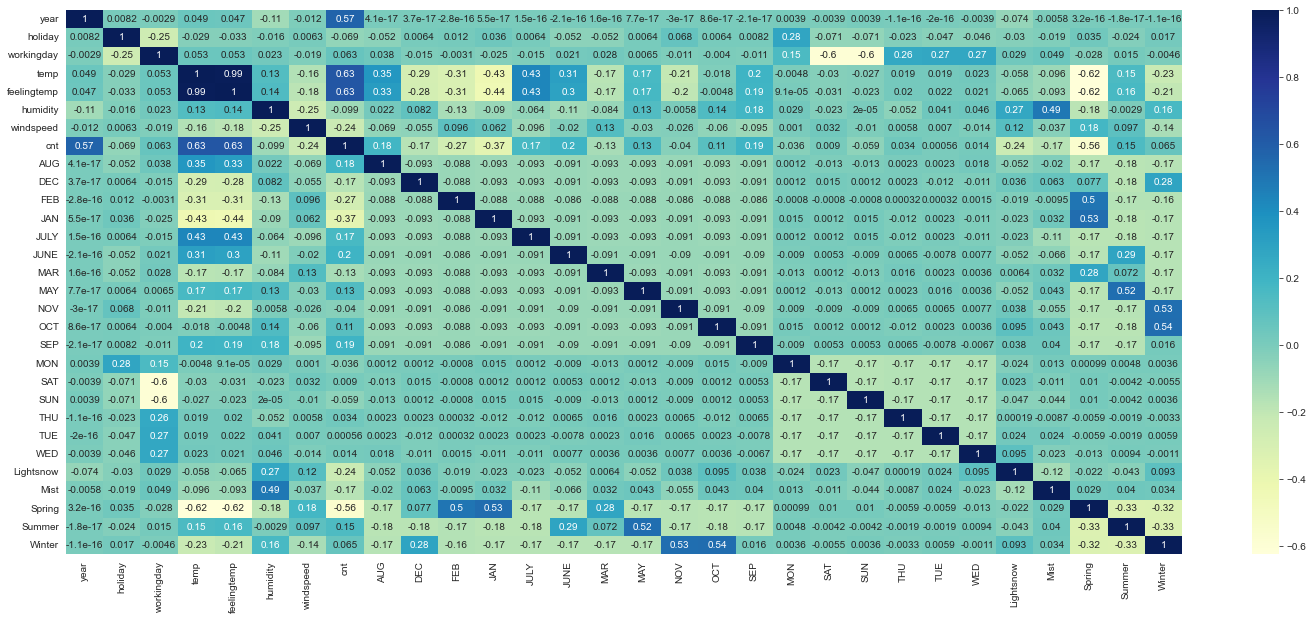

In [27]:
# To check the correlation between all the columns after the dummy variables created

plt.figure(figsize = (25, 10))
sns.heatmap(boom_bikes_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [28]:
# Before building the model , need to get the x and y from the trained dataset
y_train = boom_bikes_data_train.pop('cnt')
X_train = boom_bikes_data_train

In [29]:
# Checking the X_train dataset

print(X_train.head())

     year  holiday  workingday      temp  feelingtemp  humidity  windspeed  \
576     1        0           1  0.815169     0.766351  0.725633   0.264686   
426     1        0           0  0.442393     0.438975  0.640189   0.255342   
728     1        0           0  0.245101     0.200348  0.498067   0.663106   
482     1        0           0  0.395666     0.391735  0.504508   0.188475   
111     0        0           1  0.345824     0.318819  0.751824   0.380981   

     AUG  DEC  FEB  ...  SAT  SUN  THU  TUE  WED  Lightsnow  Mist  Spring  \
576    0    0    0  ...    0    0    0    1    0          0     0       0   
426    0    0    0  ...    1    0    0    0    0          0     1       1   
728    0    1    0  ...    0    1    0    0    0          0     0       1   
482    0    0    0  ...    1    0    0    0    0          0     1       0   
111    0    0    0  ...    0    0    0    0    0          0     1       0   

     Summer  Winter  
576       0       0  
426       0       0  
72

In [30]:
# Checking the y_train dataset

print(y_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64


# Data Modelling and Evaluation

1. Create Linear Regression model using mixed approach (RFE & VIF/p-value).
2. Check the various assumptions.
3. Check the Adjusted R-Square for both train & Test data.
4. Report the final model.


### 1.Building the Model Using Linear regression first using statsmodels
### 2.Then Try VIF for the Chosen variables
### By doing both we will be more confident on choosing the variables are significant

In [31]:
# First creating a constant for the coefficients and then using OLS method (ordinary least squares)
# Then training it by learning using fit command
# Then the summary will show all the stats.

X_train_sm = sm.add_constant(X_train)   
LR1 = sm.OLS(y_train,X_train_sm)
Lr_model1 = LR1.fit()      
print(Lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          2.81e-180
Time:                        18:45:44   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2433      0.035      6.887      

In [32]:
# So now moving to RFE to reduce the multiple columns difficulty
# Here we are using Automated chosing variable approach called RFE . Top 15 variables to perform this activity.
# Here we are using fit method for rfe.

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)                                           
rfe = rfe.fit(X_train, y_train)

In [33]:
# Checking the selected columns and unselected columns using rfe

selectedcol = X_train.columns[rfe.support_]
unselectedcol = X_train.columns[~rfe.support_]

# Print the selected and unselected columns
print(selectedcol)
print(unselectedcol)

# This provides the ranking and the support status for the rfe in the list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'JAN',
       'JULY', 'SEP', 'SAT', 'Lightsnow', 'Mist', 'Spring', 'Summer',
       'Winter'],
      dtype='object')
Index(['feelingtemp', 'AUG', 'DEC', 'FEB', 'JUNE', 'MAR', 'MAY', 'NOV', 'OCT',
       'MON', 'SUN', 'THU', 'TUE', 'WED'],
      dtype='object')


[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('feelingtemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('AUG', False, 7),
 ('DEC', False, 3),
 ('FEB', False, 4),
 ('JAN', True, 1),
 ('JULY', True, 1),
 ('JUNE', False, 14),
 ('MAR', False, 15),
 ('MAY', False, 6),
 ('NOV', False, 2),
 ('OCT', False, 13),
 ('SEP', True, 1),
 ('MON', False, 9),
 ('SAT', True, 1),
 ('SUN', False, 8),
 ('THU', False, 11),
 ('TUE', False, 10),
 ('WED', False, 12),
 ('Lightsnow', True, 1),
 ('Mist', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [34]:
# Creating a new function called calculatevif which will be used when it is called for multiple times.

def VIF(X_train):
    vif = pd.DataFrame()                                     
    vif['Features'] = X_train.columns    
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]   
    vif['VIF'] = round(vif['VIF'], 2)                        
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif  

# Linear Regression Model 1

In [35]:
# VIF

# To clear the Multicollinearity among the columns , VIF Approach is used
# VIF chosen for the selected trained columns
VIF(X_train[selectedcol])

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,Spring,4.53
14,Winter,3.46
13,Summer,2.85
11,Mist,2.29
0,year,2.09
9,SAT,1.98


In [36]:
# Using StatsModels

# Now linear regression is performed again using stat models with the input of VIF chosen columns

X_train_sm = sm.add_constant(X_train[selectedcol])   
LR2 = sm.OLS(y_train,X_train_sm)
Lr_model2 = LR2.fit()      
print(Lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          4.22e-191
Time:                        18:45:48   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

### So by concluding both the decisions of RFE and Linear regression using stats model (OLS)
### It is very clear that the "Humidity" column has HIGH VIF and Low P - Value. 
#### So First dropping the humidity column

In [37]:
# Dropping the Humidity column from the X_train 
selectedcol1 = X_train[selectedcol].drop(['humidity'], axis = 1)

# Linear Regression Model 2

In [38]:
# Now after removal of humidity column , again VIF is calculated
calculateVIF(selectedcol1)

NameError: name 'calculateVIF' is not defined

In [ ]:
# Now linear regression is performed again using stat models with the input of VIF chosen columns

X_train_sm = sm.add_constant(selectedcol1)   
LR3 = sm.OLS(y_train,X_train_sm)
Lr_model3 = LR3.fit()      
print(Lr_model3.summary())

### So by concluding both the decisions of RFE and Linear regression using stats model (OLS)
### It is very clear that the "Holiday" column has Low VIF and High P - Value. 
#### So Second dropping the Holiday column

In [ ]:
# Dropping the Humidity column from the X_train 
selectedcol1 = selectedcol1.drop(['holiday'], axis = 1)

# Linear Regression Model 3

In [39]:
# Now after removal of humidity column , again VIF is calculated
calculateVIF(selectedcol1)

NameError: name 'calculateVIF' is not defined

In [40]:
# Now linear regression is performed again using stat models with the input of VIF chosen columns

X_train_sm = sm.add_constant(selectedcol1)   
LR4 = sm.OLS(y_train,X_train_sm)
Lr_model4 = LR4.fit()      
print(Lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          1.60e-188
Time:                        18:45:52   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.0

### So by concluding both the decisions of RFE and Linear regression using stats model (OLS)
### It is very clear that the "JAN" column has Low VIF and High P - Value. 
#### So Third dropping the JAN column

In [41]:
# Dropping the Humidity column from the X_train 
selectedcol1 = selectedcol1.drop(['JAN'], axis = 1)

# Linear Regression Model 4

In [42]:
# Now after removal of humidity column , again VIF is calculated
calculateVIF(selectedcol1)

NameError: name 'calculateVIF' is not defined

In [43]:
# Now linear regression is performed again using stat models with the input of VIF chosen columns

X_train_sm = sm.add_constant(selectedcol1)   
LR5 = sm.OLS(y_train,X_train_sm)
Lr_model5 = LR5.fit()      
print(Lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          1.28e-188
Time:                        18:45:54   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1576      0.031      5.126      0.0

### So by concluding both the decisions of RFE and Linear regression using stats model (OLS)
### It is very clear that the "July" column has Low VIF and High P - Value. 
#### So Third dropping the July column

In [44]:
# Dropping the Humidity column from the X_train 
selectedcol1 = selectedcol1.drop(['JULY'], axis = 1)

# Linear Regression Model 5

In [45]:
# Now after removal of humidity column , again VIF is calculated
calculateVIF(selectedcol1)

NameError: name 'calculateVIF' is not defined

In [46]:
# Now linear regression is performed again using stat models with the input of VIF chosen columns

X_train_sm = sm.add_constant(selectedcol1)   
LR6 = sm.OLS(y_train,X_train_sm)
Lr_model6 = LR6.fit()      
print(Lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          3.16e-188
Time:                        18:45:56   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1484      0.031      4.827      0.0

### So by concluding both the decisions of RFE and Linear regression using stats model (OLS)
### It is very clear that the "Spring" column has Low VIF and High P - Value. 
#### So Third dropping the Spring column

In [47]:
# Dropping the Humidity column from the X_train 
selectedcol1 = selectedcol1.drop(['Spring'], axis = 1)

# Linear Regression Model 6

In [48]:
# Now after removal of humidity column , again VIF is calculated
calculateVIF(selectedcol1)

NameError: name 'calculateVIF' is not defined

In [49]:
# Now linear regression is performed again using stat models with the input of VIF chosen columns

X_train_sm = sm.add_constant(selectedcol1)   
LR7 = sm.OLS(y_train,X_train_sm)
Lr_model7 = LR7.fit()      
print(Lr_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.9
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          6.43e-188
Time:                        18:45:58   Log-Likelihood:                 500.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     498   BIC:                            -927.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0845      0.019      4.420      0.0

## Since the VIF is less than 5 and P- value is 0
## We can conclude the above model is best model which has 83.5 % variance utilized
## R-squared value  = 0.835

# Residual Analysis

In [50]:
# Finding the residuals by subtracting the predictor values with the trained dataset values

y_train_pred = Lr_model7.predict(X_train_sm) 
print(X_train_sm.shape)

residuals = y_train - y_train_pred
print (residuals)

(510, 12)
576    0.056777
426   -0.033655
728   -0.145395
482   -0.088661
111   -0.079278
         ...   
578    0.023265
53    -0.008011
350    0.049289
79    -0.074978
520    0.156913
Length: 510, dtype: float64


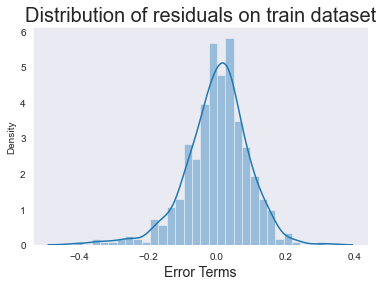

In [51]:
# Checking the Residuals distribution follows normal distribution or not

sns.distplot(residuals)
plt.title('Distribution of residuals on train dataset',fontsize = 20)
plt.xlabel('Error Terms', fontsize = 14)
plt.show()

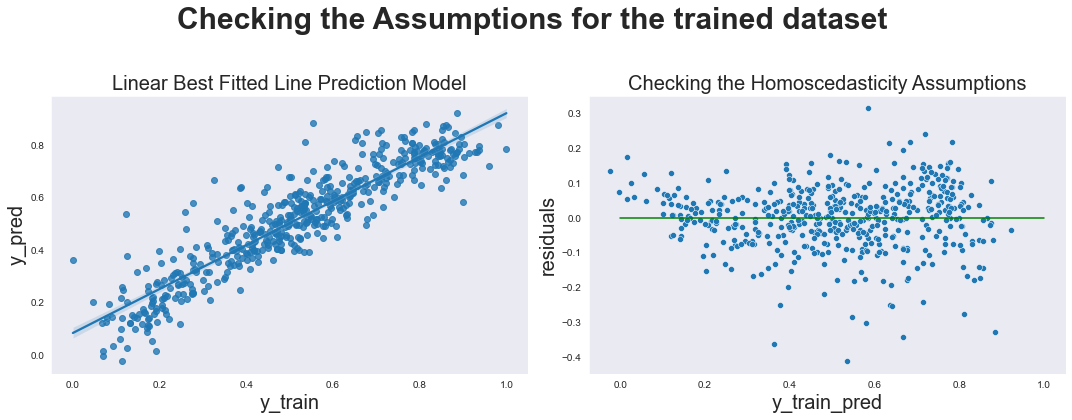

In [52]:
# Regression plot is used to visually view the linear relationships between the variables through a best fitted line.
plt.figure(figsize=(15,10))
sns.set_style("dark")
plt.suptitle("Checking the Assumptions for the trained dataset \n",fontweight ="bold",fontsize=30)
# subplot 1
plt.subplot(2,2,1)
sns.regplot(x=y_train, y=y_train_pred, fit_reg=True)
plt.title('Linear Best Fitted Line Prediction Model', fontsize=20)
plt.xlabel('y_train', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
# subplot 3
plt.subplot(2, 2,2)
sns.scatterplot(x=y_train_pred, y=residuals)
plt.title('Checking the Homoscedasticity Assumptions', fontsize=20)
plt.xlabel('y_train_pred', fontsize=20)
plt.ylabel('residuals', fontsize=20)
sns.lineplot([0,1],[0,0],color='green')
plt.tight_layout()
plt.show()

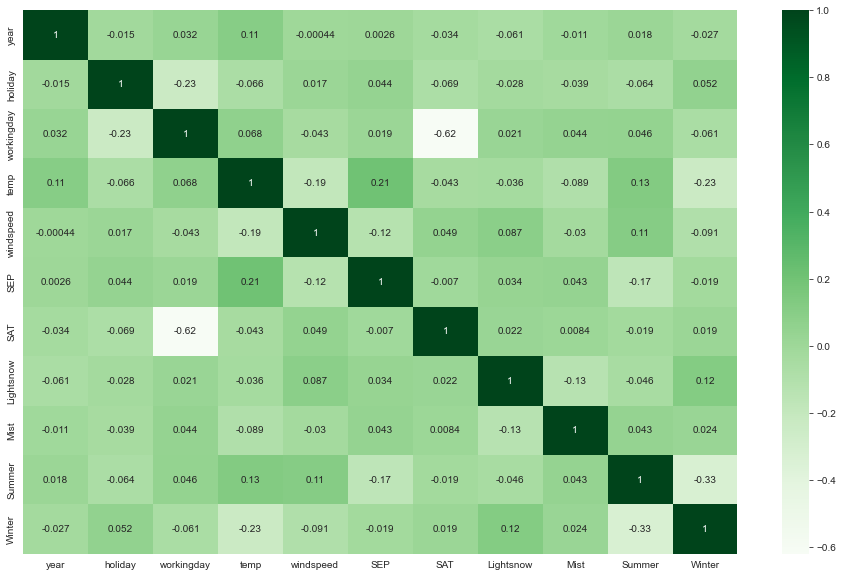

In [53]:
# TO ensure that it doesnt follow any multicollinearity after chosing the best linear models 
# Also which has p value 0 and VIF value less than 5

plt.figure(figsize = (16, 10))
sns.heatmap(selectedcol1.corr(), annot = True, cmap="Greens")
plt.show()

## Hence there is no Multicollinearity found here.

# Evaluation on Test Dataset and Predictions

## 1.Rescaling Techniques on MinMax Method

In [54]:
# Creating a variable to store the multiple columns which are required for Rescaling for test dataset

num_vars = ['temp','feelingtemp','humidity','cnt', 'windspeed']

# Now Using Scaler.transform is used to learn from the train datset and transform to the test dataset.
boom_bikes_data_test[num_vars] = scaler.transform(boom_bikes_data_test[num_vars])

In [55]:
# To View the records of the dataset

boom_bikes_data_test.head()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,cnt,AUG,DEC,...,SAT,SUN,THU,TUE,WED,Lightsnow,Mist,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [56]:
# Checking the quantitative metrics for the quantitative columns
# Checking the mean, median,mode , quantiles of any levels

boom_bikes_data_test.describe()

,year,holiday,workingday,temp,feelingtemp,humidity,windspeed,cnt,AUG,DEC,...,SAT,SUN,THU,TUE,WED,Lightsnow,Mist,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## This Ensures that all the values are not in the range of 0 to 1 even after using minmax scaling techniques. 
## This is because it learns the trained dataset and then transform in the test dataset using transform. So they wont be in the range of 0 to 1


## 2. Building the Linear Regression Model for the test dataset.
### Since we done already some filtered process of choosing the linear model , we can directly chose the last best model which we found in the trained dataset

In [57]:
# Before building the model , need to get the x and y from the test dataset
y_test = boom_bikes_data_test.pop('cnt')
X_test = boom_bikes_data_test


In [58]:
print (y_test.head())

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64


In [59]:
print (X_test.head())

     year  holiday  workingday      temp  feelingtemp  humidity  windspeed  \
184     0        1           0  0.831783     0.769660  0.657364   0.084219   
535     1        0           1  0.901354     0.842587  0.610133   0.153728   
299     0        0           1  0.511964     0.496145  0.837699   0.334206   
221     0        0           1  0.881625     0.795343  0.437098   0.339570   
152     0        0           1  0.817246     0.741471  0.314298   0.537414   

     AUG  DEC  FEB  ...  SAT  SUN  THU  TUE  WED  Lightsnow  Mist  Spring  \
184    0    0    0  ...    0    0    0    0    0          0     1       0   
535    0    0    0  ...    0    0    0    0    1          0     0       0   
299    0    0    0  ...    0    0    1    0    0          0     1       0   
221    1    0    0  ...    0    0    0    0    1          0     0       0   
152    0    0    0  ...    0    0    1    0    0          0     0       0   

     Summer  Winter  
184       0       0  
535       1       0  
29

In [60]:
X_test = X_test[selectedcol1.columns]
X_test_sm_6 = sm.add_constant(X_test)                      

#Calculate y_pred by using Predict function
y_test_pred = Lr_model7.predict(X_test_sm_6)                         

#Calculate r2 and round off
round(r2_score(y_test, y_test_pred),3)

0.797

184    0.302833
535   -0.211165
299   -0.108154
221   -0.015326
152   -0.015927
         ...   
702    0.020611
127    0.013965
640    0.052608
72    -0.049594
653    0.135177
Length: 220, dtype: float64


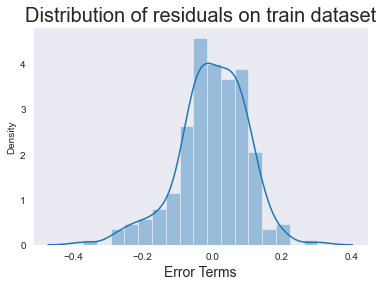

In [61]:
# Checking the Residuals distribution follows normal distribution or not for the test dataset
residuals = y_test - y_test_pred
print (residuals)
sns.distplot(residuals)
plt.title('Distribution of residuals on train dataset',fontsize = 20)
plt.xlabel('Error Terms', fontsize = 14)
plt.show()

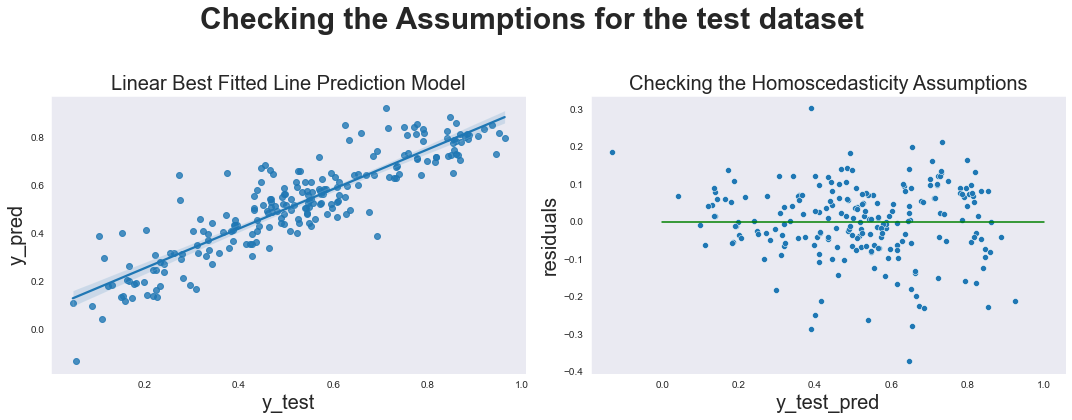

In [62]:
# Regression plot is used to visually view the linear relationships between the variables through a best fitted line.
plt.figure(figsize=(15,10))
sns.set_style("dark")
plt.suptitle("Checking the Assumptions for the test dataset \n",fontweight ="bold",fontsize=30)
# subplot 1
plt.subplot(2,2,1)
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True)
plt.title('Linear Best Fitted Line Prediction Model', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
# subplot 3
plt.subplot(2, 2,2)
sns.scatterplot(x=y_test_pred, y=residuals)
plt.title('Checking the Homoscedasticity Assumptions', fontsize=20)
plt.xlabel('y_test_pred', fontsize=20)
plt.ylabel('residuals', fontsize=20)
sns.lineplot([0,1],[0,0],color='green')
plt.tight_layout()
plt.show()

## Calculations of R-square and Adjusted R-sqaures values

In [63]:
train_r2square = round(r2_score(y_train, y_train_pred),3)
test_r2square = round(r2_score(y_test, y_test_pred),3)

print('R-squared:Trained dataset  :',round((train_r2square*100),2))
print('R-squared:Test dataset     :',round((test_r2square*100),2))


n = X_test.shape[0]
n1 = selectedcol1.shape[0]


p = X_test.shape[1]
p1 = selectedcol1.shape[1]

adjusted_r2_train = 1-(1-train_r2square)*(n1-1)/(n1-p1-1)
adjusted_r2_test = 1-(1-test_r2square)*(n-1)/(n-p-1)

print('Adjusted R-squared:Trained dataset  :',round((adjusted_r2_train*100),2))
print('Adjusted R-squared:Test dataset     :',round((adjusted_r2_test*100),2))

R-squared:Trained dataset  : 83.7
R-squared:Test dataset     : 79.7
Adjusted R-squared:Trained dataset  : 83.34
Adjusted R-squared:Test dataset     : 78.63


# Final Model and Conclusion

In [64]:
round(Lr_model7.params,3)

const         0.085
year          0.233
holiday      -0.057
workingday    0.048
temp          0.548
windspeed    -0.154
SEP           0.099
SAT           0.059
Lightsnow    -0.288
Mist         -0.081
Summer        0.088
Winter        0.131
dtype: float64

# So The Variables which are significant in predicting the demand for shared bikes

1. Year
2. Working day
3. Temp
4. Windspeed
5. Sep
6. Sat
7. Lightsnow
8. Mist
9. Summer
10. Winter

# How well those variables describe the bike demands?

cnt = 0.075 + (year x 0.233) + (workingday x 0.056) + (temp x 0.550) - (windspeed x 0.155) + (sep x 0.097) + (sat x 0.068) - (Light_snowrain x 0.0287) - (Misty x 0.080) + (summer x 0.089) + (winter x 0.131)

# How the model is significant ?

1. F - Statistics for the Best Suited Linear Regression Model is 253.0.
2. Higher the F - Statistics, the model is more significant
3. Also P value is Zero , this also proves the model is more significant.
4. Also VIF value for the chosen model is below 5


# Validations of assumptions

1. Error terms are normally distributed with mean zero.
2. The Probability of distribution of the errors has constant variance. 
3. Error values are statistically independent and not depend on any other values.
4. Independent variables having linear relationships with the dependent variables

# squared and Adjusted R-squared values for both trained and test datasets

1. R-squared:Trained dataset  : 83.5
2. R-squared:Test dataset     : 79.6
3. Adjusted R-squared:Trained dataset  : 83.17
4. Adjusted R-squared:Test dataset     : 78.62
